# Project Seattle
## Data Cleaning

## 0.Imports

In [1]:
from IPython.display import display, Markdown, Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inflection 
import pathlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

### 0.1 Page Formatting

In [2]:
from IPython.core.display import HTML

HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para células de markdown com cabeçalhos */
    h1, h2, h3 {
        background-color: #e0f7e9;   /* Fundo verde claro */
        border-radius: 8px;          /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

### 0.2 Data Collection

In [3]:
df_raw_seattle = pd.read_csv('df_raw_seattle.csv')

In [4]:
data_dict = pd.read_csv('data_dict.csv')

### 2. Data Cleaning

In [5]:
df2_raw_seattle = df_raw_seattle.copy()

In [6]:
df2_raw_seattle.shape

(14525, 43)

### 2.1 Drop rows

Essa etapa é importante ser realizada por pegamos informações de edifícios de 4 anos concecutivos, e para fazemos um comparativo entre os mesmos é necessário analisar qual edifício se mantém em todos os anos, por algum motivo pode ocorrer a falta da informação em algum ano, seja pela demolição ou que nao foi possível obter a informação do edifício naquele ano. Um processo semelhannte foi realizado no Seattle Energy Benchmarking Analysis Report 2016 Data, o que apresentado nas imagens 1 e 2, e tem como informação o seguinte trecho:

To create the “fixed” data set used for year-over-year analyses (2014-2016), buildings were first
excluded based on errors found in any one of the years 2014, 2015, or 2016. Buildings without
complete and consistent data for the entire three-year period were further excluded. These included
buildings that were either missing data, or had a year-to-year change in EUI of 50% or more. A
total of 2,024 buildings were excluded for one or more of these reasons, resulting in a dataset of
2,463 for longitudinal analyses.

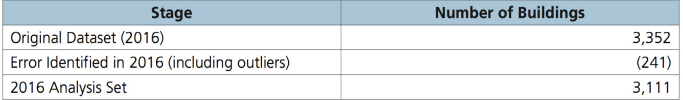
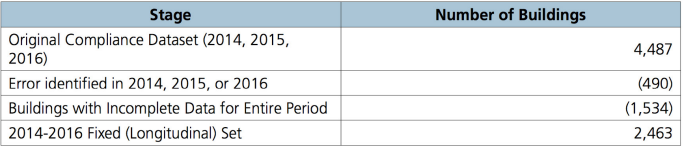

## Primeira alternativa de junção dos datasets

## Alternativa escolhida 

## E

In [7]:
# Filtrar os dados para os anos de 2019, 2020, 2021 e 2022
data_2019 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2019]
data_2020 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2020]
data_2021 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2021]
data_2022 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2022]

# Encontrar os edifícios que aparecem em todos os quatro anos
buildings_four_years = set(data_2019['BuildingName']).intersection(
                       set(data_2020['BuildingName']),
                       set(data_2021['BuildingName']),
                       set(data_2022['BuildingName'])
)

# Encontrar todos os edifícios únicos
all_buildings = set(df_raw_seattle['BuildingName'])

# Encontrar edifícios que não aparecem nos quatro anos
buildings_not_four_years = all_buildings - buildings_four_years

# Exibir a lista de edifícios que aparecem de 2019 a 2022
#print("Edifícios presentes de 2019 a 2022:")
#for edificio in edificios_quatro_anos:
#    print(edificio)


# Exibir a lista de edifícios que NÃO aparecem nos quatro anos
print("\nEdifícios que NÃO aparecem em todos os quatro anos (2019, 2020, 2021 e 2022):")
for building in buildings_not_four_years:
    print(building)
    
print("\nQuantidade de edifícios presentes de 2019 a 2022:", len(buildings_four_years))
print("\nQuantidade de edifícios que NÃO aparecem em todos os quatro anos:", len(buildings_not_four_years))



Edifícios que NÃO aparecem em todos os quatro anos (2019, 2020, 2021 e 2022):
AMAZON NITRO
NORTHCUT LANDING
HOLGATE 12
SUPERIOR SELF STORAGE MINI WHSE
SEATTLE CITY LIGHT TECHNICAL METERING OPERATIONS
RESIDENCES AT THE SANCTUARY
CLOVERDALE BUSINESS PARK (BLDG E)
LANGSTON HUGHES CULTURAL ARTS CENTER
IRON FLATS - NORTH & WEST BUILDINGS
WEST SEATTLE COMM. RESOURCE CENTER/FOOD BANK APT/MIXED USE
Valdok II
CLAY APARTMENTS (LIHI)
SEDONA 215
MILLENNIUM TOWER COMMERCIAL PORTION ONLY
Westcore River Street
2746 NE 45TH ST - PUBLIC STORAGE
EASTLAKE CENTER (NORTH)
PARK (PELICAN BAY ARTS COOP)
333 DEXTER AVE N
KING COUNTY- NORTHGATE HOUSING
LANE APARTMENTS - EAST
KIMBALL ELEMENTARY SCHOOL (SPS-DISTRICT)
EASTLAKE CENTER (North & South)
Arabelle Apartments
MAGNOLIAN APTS
TWO PINE
Warehouse Innovations
VIEWS AT MADISON VISTA
DATA CENTER
JACKSON APARTMENTS
MODERA FIRST HILL
YESLER TERRACE - RED CEDAR
SVF ADMIRAL SAFEWAY 2932
YOUTHCARE
SEATTLE PACIFIC HOTEL
PORT OF SEATTLE - WORLD TRADE CENTER-WEST
WEBS

In [8]:
# df
df2_raw_seattle = df2_raw_seattle[df2_raw_seattle['BuildingName'].isin(buildings_four_years)]

print(df2_raw_seattle.shape)

(13007, 43)


### 2.2 Remove Columns

In [9]:
df2_raw_seattle.head(100)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings
0,1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,-122.33799,DOWNTOWN,1.0,1927,12,88434,88434,0,Hotel,62.0,83.3,83.1,7363218.0,7351864.0,167.6,167.6,Hotel,88434.0,NaN,NaN,NaN,NaN,1134817.0,2159078.0,13208.0,Hotel,Compliant,No Issue,3871996.0,1320791.0,208.8,2.4,NaN
1,2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,-122.33393,DOWNTOWN,1.0,1996,11,103566,88502,15064,Hotel,70.0,90.9,90.5,8040648.0,8006404.0,153.7,153.3,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,863688.0,0.0,50595.0,Hotel,Compliant,No Issue,2946902.0,5059502.0,286.9,3.2,NaN
2,3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,-122.33822,DOWNTOWN,1.0,1969,41,956110,759392,196718,Hotel,64.0,90.4,90.0,68355568.0,68103264.0,201.5,201.1,Hotel,756493.0,Parking,138635.0,Swimming Pool,0.0,12917890.0,22601024.0,14264.0,Hotel,Compliant,No Issue,44075841.0,1426400.0,1549.0,2.0,NaN
3,5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,-122.33664,DOWNTOWN,1.0,1926,10,61320,61320,0,Hotel,58.0,103.5,103.0,6346838.0,6319004.0,177.5,176.3,Hotel,61320.0,NaN,NaN,NaN,NaN,645119.0,2104444.0,20134.0,Hotel,Compliant,No Issue,2201145.0,2013415.0,232.4,3.8,NaN
4,8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,-122.34047,DOWNTOWN,1.0,1980,18,175580,113580,62000,Hotel,63.0,128.6,128.6,15875107.0,15875107.0,212.2,212.2,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1595784.0,0.0,104303.0,Hotel,Compliant,No Issue,5444815.0,10430292.0,587.5,5.2,NaN
5,9,2019,WEST PRECINCT (SEATTLE POLICE),Nonresidential COS,0660000560,810 VIRGINIA ST,SEATTLE,WA,98101.0,47.61623,-122.33657,DOWNTOWN,1.0,1999,2,97288,60090,37198,Police Station,NaN,254.4,252.1,12913752.0,12796442.0,516.0,515.0,Police Station,50755.0,Parking,40971.0,NaN,NaN,2127021.0,0.0,55390.0,Police Station,Compliant,No Issue,7257396.0,5539047.0,338.9,5.6,NaN
6,10,2019,CAMLIN WORLDMARK HOTEL,NonResidential,0660000825,1619 9TH AVE,SEATTLE,WA,98101.0,47.61390,-122.33283,DOWNTOWN,7.0,1926,11,83008,83008,0,Hotel,59.0,69.5,69.7,5653567.0,5671968.0,122.2,123.6,Hotel,81352.0,NaN,NaN,NaN,NaN,686280.0,0.0,33304.0,Hotel,Compliant,No Issue,2341587.0,3330381.0,191.3,2.3,NaN
8,12,2019,COURTYARD BY MARRIOTT - PIONEER SQ,NonResidential,0939000080,612 2ND AVE,SEATTLE,WA,98104.0,47.60294,-122.33263,DOWNTOWN,7.0,1904,15,163984,163984,0,Hotel,69.0,88.2,87.4,14469527.0,14329436.0,160.0,158.9,Hotel,163984.0,NaN,NaN,NaN,NaN,1845087.0,0.0,80340.0,Hotel,Compliant,No Issue,6295437.0,8033999.0,465.5,2.8,NaN
9,13,2019,LYON BUILDING,Multifamily MR (5-9),0939000105,607 3RD AVE,SEATTLE,WA,98104.0,47.60284,-122.33184,DOWNTOWN,1.0,1910,6,63712,62216,1496,Multifamily Housing,23.0,83.0,81.7,5088576.0,5005885.0,158.7,157.2,Multifamily Housing,43377.0,Retail Store,10652.0,Office,7253.0,701040.0,1247583.0,13664.0,Multifamily MR (5-9),Compliant,No Issue,2391947.0,1366355.0,153.6,2.5,NaN
10,15,2019,HOTEL MONACO,NonResidential,0942000145,1101 4TH AVE,SEATTLE,WA,98101.0,47.60695,-122.33414,DOWNTOWN,1.0,1969,11,153163,133884,19279,Hotel,12.0,123.3,124.0,19070178.0,19185970.0,238.8,240.5,Hotel,154723.0,NaN,NaN,NaN,N

In [10]:
City, State

NameError: name 'City' is not defined

In [ ]:
df2_raw_seattle['ENERGYSTARScore'].unique()

In [ ]:
df2_raw_seattle['ENERGYSTARScore'].isnull().sum()

In [ ]:
(df2_raw_seattle['PropertyGFAParking'] == 0).sum()

In [ ]:
(df2_raw_seattle['LargestPropertyUseType'] == df2_raw_seattle['EPAPropertyType']).sum()

### 2.3 Data Type Correction

In [11]:
df2_raw_seattle.shape

(13007, 43)

In [12]:
df2_raw_seattle.isnull().sum() / len(df2_raw_seattle)*100

OSEBuildingID                       0.000000
DataYear                            0.000000
BuildingName                        0.000000
BuildingType                        0.000000
TaxParcelIdentificationNumber       0.000000
Address                             0.000000
City                                0.015376
State                               0.015376
ZipCode                             0.814946
Latitude                            0.015376
Longitude                           0.015376
Neighborhood                        0.030753
CouncilDistrictCode                 0.222957
YearBuilt                           0.000000
NumberofFloors                      0.000000
PropertyGFATotal                    0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PrimaryPropertyType                75.328669
ENERGYSTARScore                    21.019451
SiteEUIWN(kBtu/sf)                  5.112632
SiteEUI(kBtu/sf)                    4.336127
SiteEnergy

In [13]:
# Dropar os valores ausentes da coluna 'coluna1'
df2_raw_seattle = df2_raw_seattle.dropna(subset=['ENERGYSTARScore'])

In [18]:
# Filtrar os dados para os anos de 2019, 2020, 2021 e 2022
data_2019 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2019]
data_2020 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2020]
data_2021 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2021]
data_2022 = df2_raw_seattle[df2_raw_seattle['DataYear'] == 2022]

# Encontrar os edifícios que aparecem em todos os quatro anos
buildings_four_years = set(data_2019['BuildingName']).intersection(
                       set(data_2020['BuildingName']),
                       set(data_2021['BuildingName']),
                       set(data_2022['BuildingName'])
)

# Encontrar todos os edifícios únicos
all_buildings = set(df_raw_seattle['BuildingName'])

# Encontrar edifícios que não aparecem nos quatro anos
buildings_not_four_years = all_buildings - buildings_four_years

# Exibir a lista de edifícios que aparecem de 2019 a 2022
#print("Edifícios presentes de 2019 a 2022:")
#for edificio in edificios_quatro_anos:
#    print(edificio)


# Exibir a lista de edifícios que NÃO aparecem nos quatro anos
print("\nEdifícios que NÃO aparecem em todos os quatro anos (2019, 2020, 2021 e 2022):")
#for building in buildings_not_four_years:
    #print(building)
    
print("\nQuantidade de edifícios presentes de 2019 a 2022:", len(buildings_four_years))
print("\nQuantidade de edifícios que NÃO aparecem em todos os quatro anos:", len(buildings_not_four_years))

# df
df2_raw_seattle = df2_raw_seattle[df2_raw_seattle['BuildingName'].isin(buildings_four_years)]

print(df2_raw_seattle.shape)



Edifícios que NÃO aparecem em todos os quatro anos (2019, 2020, 2021 e 2022):

Quantidade de edifícios presentes de 2019 a 2022: 2018

Quantidade de edifícios que NÃO aparecem em todos os quatro anos: 1936


In [19]:
# df
df2_raw_seattle = df2_raw_seattle[df2_raw_seattle['BuildingName'].isin(buildings_four_years)]

print(df2_raw_seattle.shape)

(8158, 43)


In [20]:
# Contar ocorrências dos edifícios no DataFrame original
print(df2_raw_seattle['BuildingName'].value_counts())

# Contar ocorrências dos edifícios após o filtro
print(df2_raw_seattle[df2_raw_seattle['BuildingName'].isin(buildings_four_years)]['BuildingName'].value_counts())


OFFICE BUILDING                                                      21
WAREHOUSE                                                            20
BRENTWOOD SQUARE APTS                                                12
APARTMENTS                                                           12
CANAL PL OFFICE PARK                                                  9
RUDD COMPANY                                                          9
ROOSEVELT APARTMENTS                                                  8
PAPE' MATERIAL HANDLING                                               8
MAGNOLIA MANOR                                                        8
GRANGE OFFICE PLAZA                                                   8
HOME DEPOT                                                            8
32 UNIT APT                                                           5
LAKE CITY CENTER                                                      5
KING STREET CENTER                                              